In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [8]:
# 数据量。
SIZE = 50
# 产生数据。np.linspace 返回一个一维数组，SIZE指定数组长度。
# 数组最小值是0，最大值是10。所有元素间隔相等。
X = np.linspace(0, 10, SIZE)
Y = 3 * X + 10

Text(0.5, 1.0, 'RANSAC')

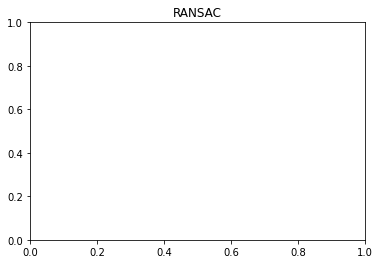

In [3]:
fig = plt.figure()
# 画图区域分成1行1列。选择第一块区域。
ax1 = fig.add_subplot(1, 1, 1)
# 标题
ax1.set_title("RANSAC")

In [4]:
# 让散点图的数据更加随机并且添加一些噪声。
random_x = []
random_y = []
# 添加直线随机噪声
for i in range(SIZE):
    random_x.append(X[i] + random.uniform(-0.5, 0.5)) 
    random_y.append(Y[i] + random.uniform(-0.5, 0.5)) 
# 添加随机噪声
for i in range(SIZE):
    random_x.append(random.uniform(0,10))
    random_y.append(random.uniform(10,40))
RANDOM_X = np.array(random_x) # 散点图的横轴。
RANDOM_Y = np.array(random_y) # 散点图的纵轴。

In [11]:
# 画散点图。
ax1.scatter(RANDOM_X, RANDOM_Y)
# 横轴名称。
ax1.set_xlabel("x")
# 纵轴名称。
ax1.set_ylabel("y")

Text(3.200000000000003, 0.5, 'y')

In [ ]:
# 使用RANSAC算法估算模型
# 迭代最大次数，每次得到更好的估计会优化iters的数值
iters = 100000
# 数据和模型之间可接受的差值
sigma = 0.25

# 最好模型的参数估计和内点数目
best_a = 0
best_b = 0
pretotal = 0
# 希望的得到正确模型的概率
P = 0.99
for i in range(iters):
    # 随机在数据中红选出两个点去求解模型
    sample_index = random.sample(range(SIZE * 2),2)
    x_1 = RANDOM_X[sample_index[0]]
    x_2 = RANDOM_X[sample_index[1]]
    y_1 = RANDOM_Y[sample_index[0]]
    y_2 = RANDOM_Y[sample_index[1]]

    # y = ax + b 求解出a，b
    a = (y_2 - y_1) / (x_2 - x_1)
    b = y_1 - a * x_1

    # 算出内点数目
    total_inlier = 0
    for index in range(SIZE * 2):
        y_estimate = a * RANDOM_X[index] + b
        if abs(y_estimate - RANDOM_Y[index]) < sigma:
            total_inlier = total_inlier + 1

    # 判断当前的模型是否比之前估算的模型好
    if total_inlier > pretotal:
        iters = math.log(1 - P) / math.log(1 - pow(total_inlier / (SIZE * 2), 2))
        pretotal = total_inlier
        best_a = a
        best_b = b

    # 判断是否当前模型已经符合超过一半的点
    if total_inlier > SIZE:
        break

# 用我们得到的最佳估计画图
Y = best_a * RANDOM_X + best_b

In [15]:
# 直线图
ax1.plot(RANDOM_X, Y)
text = "best_a = " + str(best_a) + "\nbest_b = " + str(best_b)
plt.text(5,10, text,
         fontdict={'size': 8, 'color': 'r'})
plt.show()

In [1]:
import numpy as np
import torch
import math

In [19]:
# points = np.random.randn(16, 100, 3)
points = torch.randn(16, 100, 3)
print(points.shape)
p = points[:, 1, :]
print(p.shape)

torch.Size([16, 100, 3])
torch.Size([16, 3])


100

In [26]:
def quality_function(theta, sigma, points):
    num_points = points.size(1) # points: [B, num_points, dim_feat]
    for i in range(num_points):
        p = points[:, i, :]  # [B, dim_feat]
        # print(p.shape)
    return 0

In [27]:
q = quality_function(theta=1, sigma=2, points=points)

In [44]:
np.random.seed(1234)
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))]

-1.59249315299401